# Importing Necessary Libraries:

Below is the list of Libraries that is used in this project.

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import cufflinks as cf
import plotly.figure_factory as ff
init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline

# Background of the Data:

I have used the "Ecommerce Customers" csv file from the company. It has Customer info, such as Email, Address, and their color Avatar. Then it also has numerical value columns:

Avg. Session Length: Average session of in-store style advice sessions. 
Time on App: Average time spent on App in minutes. 
Time on Website: Average time spent on Website in minutes. 
Length of Membership: How many years the customer has been a member.

In [2]:
customers = pd.read_csv('Ecommerce Customers')

In [12]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [13]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [14]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


# Exploratory Data Analysis (EDA):

In [12]:
profile = ProfileReport(customers, title='Pandas Profiling Report', explorative=True)

In [13]:
profile

In [8]:
customers.iplot(kind='scatter',x='Time on Website',y='Yearly Amount Spent',mode='markers',xTitle='Time on Website',yTitle='Yearly Amount Spent')

In [5]:
customers.iplot(kind='scatter',x='Time on App',y='Yearly Amount Spent',mode='markers',xTitle='Time on App',yTitle='Yearly Amount Spent')

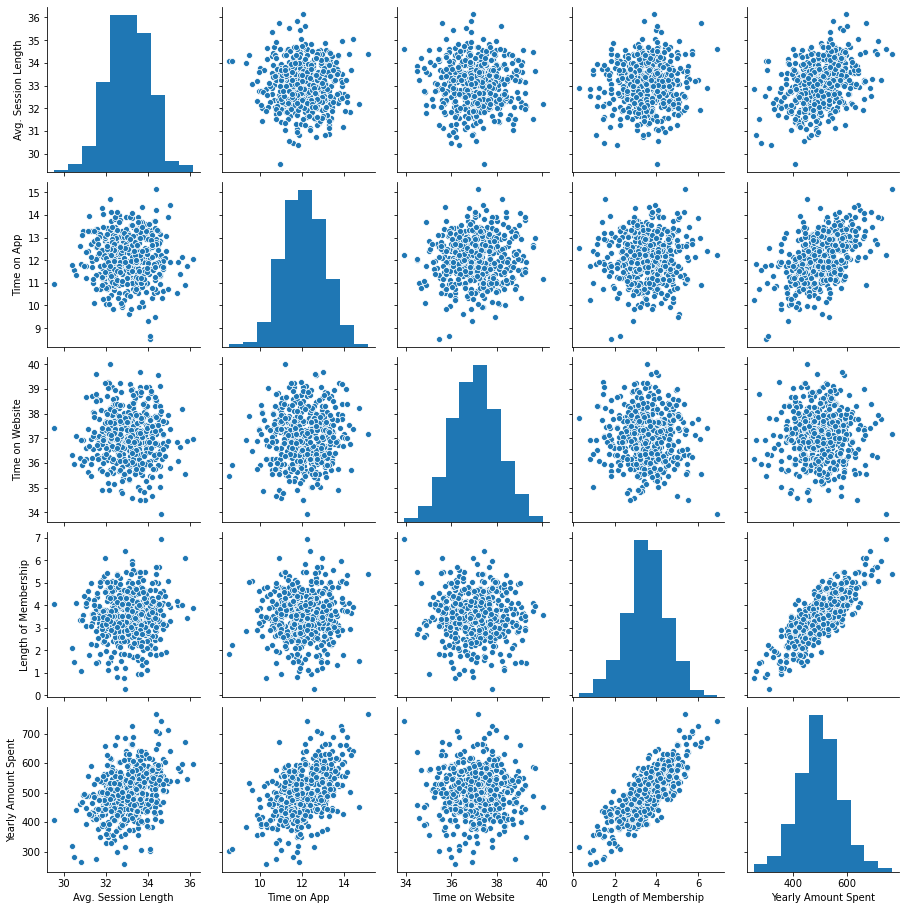

In [36]:
sns.pairplot(customers)

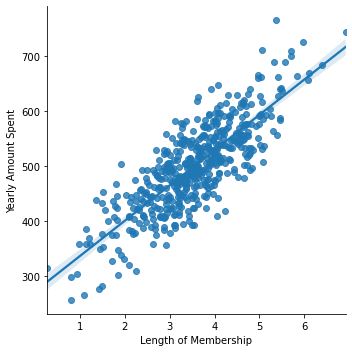

In [51]:
sns.lmplot(data=customers,x='Length of Membership',y='Yearly Amount Spent')

Exploratory Data Analysis:
1) There are some correlation between the Time spent on App and the Yearly Amount Spent by customers.
2) Length of Membership is the most correlated feature with Yearly Amount Spent by customers.

# Training and Testing Data:

In [43]:
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = customers[['Yearly Amount Spent']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Training the Model:

In [44]:
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.coef_)

[[25.98154972 38.59015875  0.19040528 61.27909654]]


# Predicting Test Data:

In [45]:
predictions = lm.predict(X_test)

# Creating a Scatterplot of the real test values vs. the predicted values:

Text(0, 0.5, 'Predicted Values')

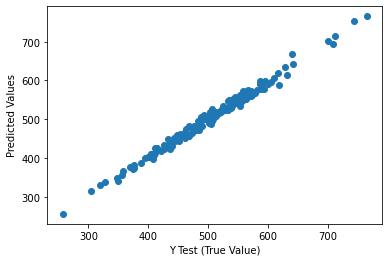

In [47]:
plt.scatter(y_test,predictions)
plt.xlabel("Y Test (True Value)")
plt.ylabel("Predicted Values")

# Evaluating the Model"

In [48]:
print('MAE ',metrics.mean_absolute_error(y_test,predictions))
print('MSE ',metrics.mean_squared_error(y_test,predictions))
print('RMSE ',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE  7.228148653430853
MSE  79.81305165097487
RMSE  8.933815066978656


# Residuals:

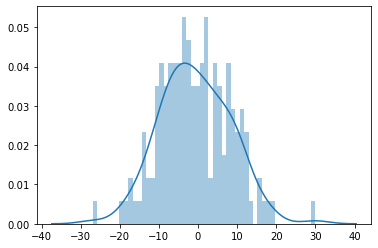

In [49]:
sns.distplot((y_test-predictions),bins=50)

# Conclusion:

In [50]:
cdf = pd.DataFrame(lm.coef_.T,X.columns,columns=['Coef'])
print(cdf)

                           Coef
Avg. Session Length   25.981550
Time on App           38.590159
Time on Website        0.190405
Length of Membership  61.279097


Interpreting the coefficients:

#Holding all other features fixed, a 1 unit increase in Avg. Session Length is associated with an increase of 25.98 total dollars spent.
#Holding all other features fixed, a 1 unit increase in Time on App is associated with an increase of 38.59 total dollars spent. 
#Holding all other features fixed, a 1 unit increase in Time on Website is associated with an increase of 0.19 total dollars spent. 
#Holding all other features fixed, a 1 unit increase in Length of Membership is associated with an increase of 61.27 total dollars spent.

#Based on the coefficients and the exploratory data analysis is can be said that the company should focus their efforts on mobile app experience. 
#Additionally the company should also focus on increasing the length of membership since it will increase the yearly amount spent by the customers.